# **Life Expectancy Analysis Project**

##Objective
The objective of this project is to perform exploratory data analysis on a country-level life expectancy dataset. The project aims to analyze and identify key factors influencing life expectancy, including health-related indicators (such as adult mortality, infant deaths, HIV/AIDS prevalence, immunization coverage), lifestyle factors (alcohol consumption, BMI), socio-economic factors (GDP, schooling, income composition), and healthcare expenditure. Through data cleaning, visualization and statistical analysis, the project seeks to uncover meaningful patterns, trends, and relationships that can help understand variations in life expectancy across developed and developing countries.

##Dataset Description

The dataset used in this project has been collected from the World Health Organization (WHO) data repository and supplemented with socio-economic indicators obtained from the United Nations database.

The dataset consists of 2,938 records (rows) and 22 variables (columns), covering multiple countries across different years. The variables include health indicators such as adult mortality, infant deaths, HIV/AIDS prevalence, hepatitis B immunization, and BMI, along with lifestyle factors like alcohol consumption and socio-economic indicators such as GDP, schooling, income composition, and healthcare expenditure.


In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
#loading dataset
df=pd.read_csv('/content/Life Expectancy Data csv.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Observation**

Essential libraries such as Pandas, NumPy, and Matplotlib were imported for data manipulation and visualization. The dataset was then loaded into a DataFrame, and the first few rows were displayed to understand its structure and variables.

In [91]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Diphtheria',
       'Schooling_group', 'Income_group', 'Polio Group',
       'Adult_Mortality_group', 'Infant_deaths_group'],
      dtype='object')

In [60]:
#initial data exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [61]:
## Checking for Missing Values
df.columns
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Missing values were identified across several health and socio-economic variables, indicating the need for appropriate data imputation strategies before proceeding with analysis.

In [62]:
## Removing Records with Missing Life Expectancy
df = df.dropna(subset=['Life expectancy '])

Rows with missing values in the Life Expectancy column were removed to ensure the integrity of the analysis, as Life Expectancy is the primary outcome variable of this study.

In [63]:
## Handling Missing Values Using Country-wise and Overall Imputation
df['Alcohol'] = df.groupby('Country')['Alcohol'].transform(
    lambda x: x.fillna(x.median())
)
overall_alcohol_median = df['Alcohol'].median()
df['Alcohol'] = df['Alcohol'].fillna(overall_alcohol_median)

df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].transform(
    lambda x: x.fillna(x.median())
)
overall_median = df['Hepatitis B'].median()
df['Hepatitis B'] = df['Hepatitis B'].fillna(overall_median)

df[' BMI '] = df.groupby('Country')[' BMI '].transform(
    lambda x: x.fillna(x.median())
)
bmi_median = df[' BMI '].median()

df[' BMI '].fillna(bmi_median, inplace=True)

df['Polio'] = df.groupby('Country')['Polio'].transform(
    lambda x: x.fillna(x.median())
)

df['Diphtheria']=df.groupby('Country')['Diphtheria '].transform(lambda x: x.fillna(x.median()))

overall_median=df['Diphtheria '].median()
df['Diphtheria '].fillna(overall_median,inplace=True)

df['Population'] = df['Population'].fillna(df['Population'].median())


/tmp/ipython-input-1479807856.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' BMI '].fillna(bmi_median, inplace=True)
/tmp/ipython-input-1479807856.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Missing values in key health indicators such as Alcohol consumption, Hepatitis B, BMI, Polio, and Diphtheria immunization were first imputed using country-wise median values to preserve national trends. Any remaining missing values were filled using overall median values to ensure dataset completeness.

In [68]:
## Imputing Socio-Economic Variables Using Mean Strategy
# Total Expenditure
df['Total expenditure'] = df.groupby('Country')['Total expenditure'] \
    .transform(lambda x: x.fillna(x.mean()))

df['Total expenditure'] = df['Total expenditure'].fillna(
    df['Total expenditure'].mean()
)

# GDP
df['GDP'] = df.groupby('Country')['GDP'] \
    .transform(lambda x: x.fillna(x.mean()))

df['GDP'] = df['GDP'].fillna(df['GDP'].mean())

# Thinness 1-19
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(
    df[' thinness  1-19 years'].mean()
)

# Thinness 5-9
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(
    df[' thinness 5-9 years'].mean()
)

# Income Composition
df['Income composition of resources'] = (
    df.groupby('Country')['Income composition of resources']
      .transform(lambda x: x.fillna(x.mean()))
)

df['Income composition of resources'] = df[
    'Income composition of resources'
].fillna(df['Income composition of resources'].mean())

# Schooling
df['Schooling'] = (
    df.groupby('Country')['Schooling']
      .transform(lambda x: x.fillna(x.mean()))
)

df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

Missing values in socio-economic variables including Total Expenditure, GDP, Income Composition of Resources, and Schooling were imputed using country-wise mean values to maintain country-specific economic trends. Remaining null values were filled using overall mean values to ensure data completeness. Thinness indicators were imputed using mean values to preserve overall distribution patterns.

In [69]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [70]:
## Correlation Analysis with Life Expectancy
corr = df.corr(numeric_only=True)['Life expectancy '].sort_values(ascending=False)
corr


,Life expectancy
Life expectancy,1.000000
Schooling,0.718614
Income composition of resources,0.692621
BMI,0.558888
Diphtheria,0.485097
Diphtheria,0.473268
Polio,0.471586
GDP,0.436887
Alcohol,0.405724
percentage expenditure,0.381864


A correlation matrix was computed to examine the relationship between Life Expectancy and other numerical variables. The results were sorted in descending order to identify the strongest positive and negative factors influencing life expectancy.

In [72]:
## Analyzing Life Expectancy Across Schooling Levels
bins = [0, 8, 12, df['Schooling'].max()]
labels = ['Low schooling (≤8)', 'Medium schooling (9–12)', 'High schooling (>12)']

df['Schooling_group'] = pd.cut(df['Schooling'], bins=bins, labels=labels)
grouped_df = df.groupby('Schooling_group', observed=True)['Life expectancy '] \
               .mean() \
               .reset_index()

The Schooling variable was categorized into Low, Medium, and High education groups using defined ranges. The average life expectancy was then calculated for each schooling group to examine how education level influences life expectancy outcomes.

In [76]:
## Categorizing Income Composition into Quantile-Based Groups
df['Income_group'] = pd.qcut(
    df['Income composition of resources'],
    q=3,
    labels=['Low income composition', 'Medium income composition', 'High income composition']
)

The Income Composition of Resources variable was divided into three quantile-based groups (Low, Medium, High) using qcut(). This approach ensures an approximately equal distribution of observations in each category, enabling comparative analysis of life expectancy across different economic resource levels.

In [75]:
## Year-wise Correlation Between Income Composition and Life Expectancy
year_corr = (
    df.groupby('Year')
      .apply(lambda x: x['Life expectancy '].corr(x['Income composition of resources']))
      .reset_index(name='Correlation')
)
year_corr.head()

/tmp/ipython-input-3360034847.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Life expectancy '].corr(x['Income composition of resources']))


,Year,Correlation
0,2000,0.512985
1,2001,0.586633
2,2002,0.585891
3,2003,0.592859
4,2004,0.599430


 Year-wise correlation analysis indicates a consistent positive relationship between income composition of resources and life expectancy. This suggests that improvements in economic and resource distribution factors are moderately associated with higher life expectancy across countries.

In [77]:
## Categorizing Polio into Quantile-Based Groups
df['Polio Group'] = pd.qcut(
    df['Polio'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

The Polio vaccination column was categorized into three groups—Low, Medium, and High coverage—using quantile-based binning. This allows comparison of life expectancy across countries with different levels of polio immunization.

In [118]:
df.columns = df.columns.str.strip()

In [119]:
## Categorizing Alcohol into Quantile-Based Groups
df['Alcohol_Group'] = pd.qcut(df['Alcohol'], q=3, labels=['Low', 'Medium', 'High'])

In [107]:
## Categorizing Adult Mortality into Quantile-Based Groups
df['Adult_Mortality_group'] = pd.qcut(
    df['Adult Mortality'],
    q=3,
    labels=['Low Adult Mortality', 'Medium Adult Mortality', 'High Adult Mortality']
)


In [120]:
## Categorizing Population into Quantile-Based Groups
pd.qcut(df['Population'], q=3, labels=['Low population', 'Medium population', 'High population']
        )
print(pd.qcut(df['Population'], q=3).unique())

[(2262640.0, 1293859294.0], (33.999, 854972.333], (854972.333, 2262640.0]]
Categories (3, interval[float64, right]): [(33.999, 854972.333] < (854972.333, 2262640.0] <
                                           (2262640.0, 1293859294.0]]


In [121]:
# Categorization of thinness 1-19 yrs into four groups
df['thinness  1-19 years group'] = pd.cut(
    df['thinness  1-19 years'],
    bins=[0, 5, 10, 20, df['thinness  1-19 years'].max()],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

In [122]:
# Categorization of infant death into Four Groups
df['Infant_deaths_group'] = pd.cut(
    df['infant deaths'],
    bins=[-1, 100, 500, 1000, df['infant deaths'].max()],
    labels=['Low (0–100)', 'Moderate (101–500)', 'High (501–1000)', 'Very High (>1000)']
)



The variables HIV/AIDS prevalence, Population, Adult Mortality, Infant Death, and Thinness (1–19 yrs) were categorized into meaningful bin-wise groups to facilitate comparison with life expectancy. This grouping allows analysis of how different levels of each factor relate to variations in life expectancy across countries.

In [125]:
df.to_csv('cleaned_life_expectancy.csv', index=False)

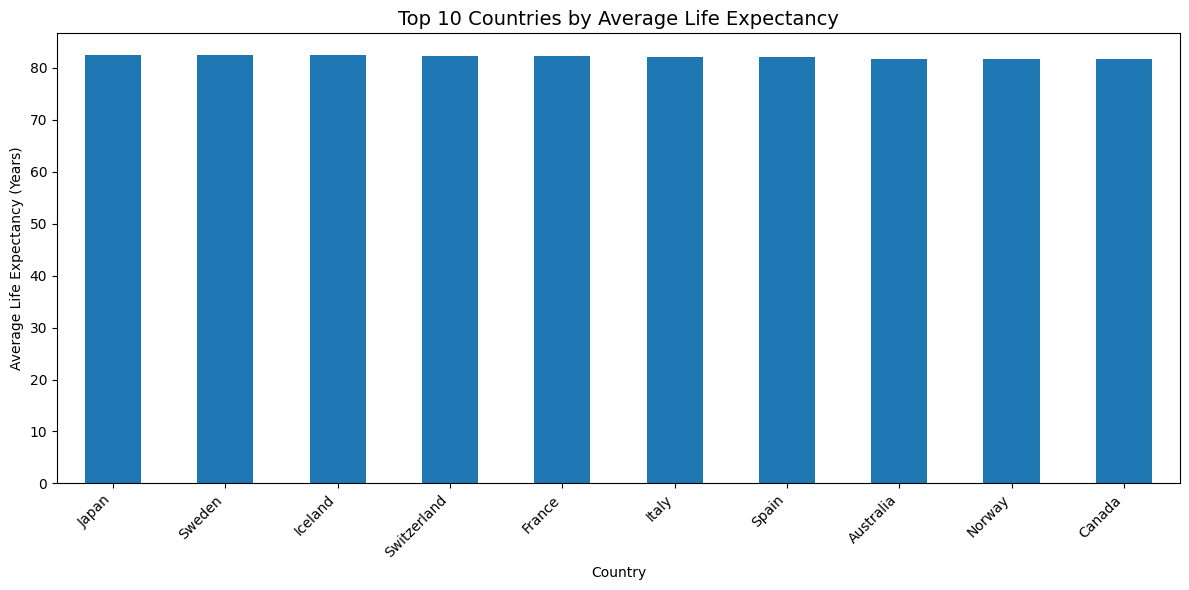

In [127]:
country_life = (
    df.groupby('Country')['Life expectancy']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
country_life.plot(kind='bar')

plt.title('Top 10 Countries by Average Life Expectancy', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


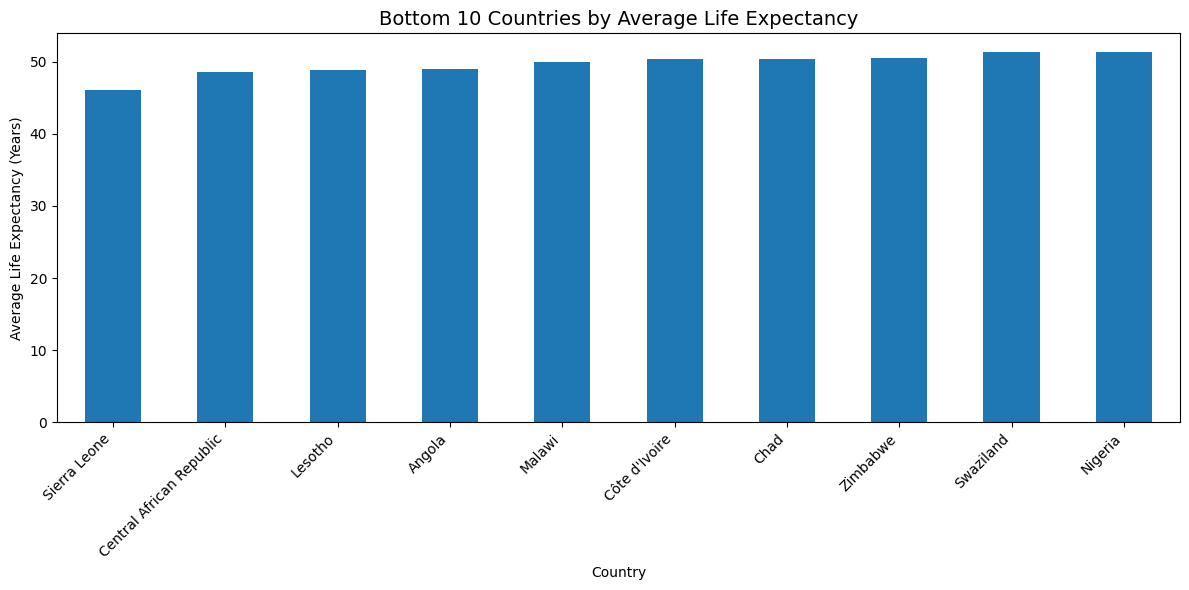

In [128]:
bottom_country_life = (
    df.groupby('Country')['Life expectancy']
    .mean()
    .sort_values()
    .head(10)
)

plt.figure(figsize=(12, 6))
bottom_country_life.plot(kind='bar')

plt.title('Bottom 10 Countries by Average Life Expectancy', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Key Insights and Observations

- Education-related factors such as **schooling** show the strongest positive influence on life expectancy.
- **Income composition of resources and GDP** are positively associated with life expectancy, highlighting the importance of economic stability.
- Higher **immunization coverage** contributes to increased life expectancy by reducing preventable diseases.
- **Adult mortality and infant deaths** have a significant negative impact on life expectancy.
- **HIV/AIDS prevalence** shows a strong inverse relationship with life expectancy.
- Countries such as **Japan, Sweden, Canada, Switzerland, and France** demonstrate the highest average life expectancy, reflecting effective healthcare systems and public health policies.


## Conclusion

The analysis demonstrates that life expectancy is strongly influenced by a combination of healthcare, education, and economic factors. Countries with better education levels, higher income resources, and strong immunization programs tend to have higher life expectancy, while high mortality rates, infectious diseases, and poor maternal and child health reduce population longevity.


## Recommendations

- Improve access to education, as schooling has a long-term positive effect on life expectancy.
- Strengthen maternal and child healthcare services to reduce infant mortality.
- Expand immunization programs to prevent communicable diseases.
- Enhance prevention and treatment strategies for HIV/AIDS.
- Optimize healthcare expenditure to improve overall health outcomes.


## Limitations

- The dataset is aggregated at the country level and does not capture individual-level variations.
- Some indicators may be influenced by reporting inconsistencies across countries.
- The analysis focuses on correlation and does not establish causal relationships.
